In [10]:
import numpy as np

# Parameters
rows, cols = 10, 10
reward_state = (9, 9)
holes = [(0,1),(1,3),(1,6),(2,1),(2,8),(3,3),(3,6),(4,1),(4,7),(4,9),(5,2),(5,7),(6,5),(6,6),(6,7),(7,5),(7,7),(8,1),(9,5)]
terminal_states = holes + [reward_state]
reward = 10
punishment = -10
penalty = -0.1
actions = ["U", "D", "L", "R"]
action_affect = {"U": (-1, 0), "D": (1, 0), "L": (0, -1), "R": (0, 1)}

# Initialize states, values, and policy
states = [(r, c) for r in range(rows) for c in range(cols)]
values = {s: 0 for s in states if s not in terminal_states}
policy = {s: np.random.choice(actions) for s in states if s not in terminal_states}

# Parameters for value iteration
theta = 0.01  # Threshold for convergence
gamma = 0.99  # Discount factor

def step(state, action):
    if state == reward_state or state in holes:
        return state

    next_state = (state[0] + action_affect[action][0], state[1] + action_affect[action][1])
    if next_state in holes or next_state[0] < 0 or next_state[0] >= rows or next_state[1] < 0 or next_state[1] >= cols:
        return state

    return next_state

def value_iteration(values, policy):
    while True:
        delta = 0
        for state in values.keys():
            v = values[state]
            max_value = float("-inf")
            best_action = None
            for action in actions:
                next_state = step(state, action)
                if next_state == reward_state:
                    r = reward
                elif next_state in holes:
                    r = punishment
                else:
                    r = penalty

                value = r + gamma * values.get(next_state, 0)
                
                if value > max_value:
                    max_value = value
                    best_action = action
            values[state] = max_value
            policy[state] = best_action
            delta = max(delta, abs(v - values[state]))
        if delta < theta:
            break
    return values, policy

# Call the value_iteration function
final_values, final_policy = value_iteration(values, policy)

# Print the final values and policy
print("Final Values:")
for state, value in final_values.items():
    print(f"State: {state}, Value: {value:.2f}")

print("\nFinal Policy:")
for state, action in final_policy.items():
    print(f"State: {state}, Action: {action}")


Final Values:
State: (0, 0), Value: 6.86
State: (0, 2), Value: 7.20
State: (0, 3), Value: 7.37
State: (0, 4), Value: 7.55
State: (0, 5), Value: 7.73
State: (0, 6), Value: 7.91
State: (0, 7), Value: 8.09
State: (0, 8), Value: 7.91
State: (0, 9), Value: 8.09
State: (1, 0), Value: 7.03
State: (1, 1), Value: 7.20
State: (1, 2), Value: 7.37
State: (1, 4), Value: 7.73
State: (1, 5), Value: 7.91
State: (1, 7), Value: 8.27
State: (1, 8), Value: 8.09
State: (1, 9), Value: 8.27
State: (2, 0), Value: 7.20
State: (2, 2), Value: 7.55
State: (2, 3), Value: 7.73
State: (2, 4), Value: 7.91
State: (2, 5), Value: 8.09
State: (2, 6), Value: 8.27
State: (2, 7), Value: 8.45
State: (2, 9), Value: 8.45
State: (3, 0), Value: 7.37
State: (3, 1), Value: 7.55
State: (3, 2), Value: 7.73
State: (3, 4), Value: 8.09
State: (3, 5), Value: 7.91
State: (3, 7), Value: 8.64
State: (3, 8), Value: 8.83
State: (3, 9), Value: 8.64
State: (4, 0), Value: 7.55
State: (4, 2), Value: 7.91
State: (4, 3), Value: 8.09
State: (4, 4),

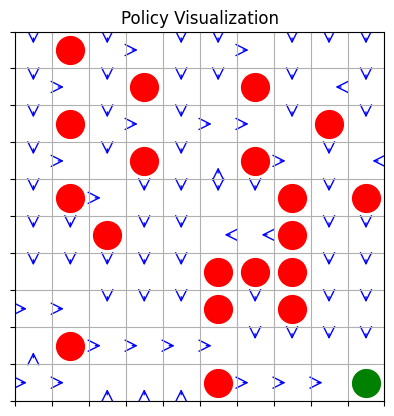

In [11]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import numpy as np

def visualize_policy(policy):
    fig, ax = plt.subplots()
    for state, action in policy.items():
        row, col = state
        if state == reward_state:
            ax.plot(col + 0.5, row + 0.5, 'go', markersize=20)  # Mark reward state as green
        elif state in holes:
            ax.plot(col + 0.5, row + 0.5, 'ro', markersize=20)  # Mark holes as red
        else:
            if action == 'U':
                arrow = FancyArrowPatch((col + 0.5, row + 0.9), (col + 0.5, row + 0.6), mutation_scale=20, arrowstyle='->', color='blue')
            elif action == 'D':
                arrow = FancyArrowPatch((col + 0.5, row + 0.1), (col + 0.5, row + 0.4), mutation_scale=20, arrowstyle='->', color='blue')
            elif action == 'L':
                arrow = FancyArrowPatch((col + 0.9, row + 0.5), (col + 0.6, row + 0.5), mutation_scale=20, arrowstyle='->', color='blue')
            elif action == 'R':
                arrow = FancyArrowPatch((col + 0.1, row + 0.5), (col + 0.4, row + 0.5), mutation_scale=20, arrowstyle='->', color='blue')
            ax.add_patch(arrow)
    # Mark holes and reward state as red
    for hole in holes:
        ax.plot(hole[1] + 0.5, hole[0] + 0.5, 'ro', markersize=20)
    ax.plot(reward_state[1] + 0.5, reward_state[0] + 0.5, 'go', markersize=20)
    ax.set_xlim([0, cols])
    ax.set_ylim([0, rows])
    ax.set_aspect('equal')
    ax.invert_yaxis()  # Invert y-axis to match grid orientation
    ax.grid(True)
    ax.set_xticks(np.arange(0, cols + 1, 1))
    ax.set_yticks(np.arange(0, rows + 1, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.title('Policy Visualization')
    plt.show()

# Visualize the policy
visualize_policy(final_policy)
